# Imports

In [1]:
import numpy as np
from Fit import Fit
from funcs import *
from stats import *

# Funcs

In [128]:
def G_R(w, R, L):
    return R/np.sqrt(R**2 + (w*L)**2)

def G_L(w, R, L):
    return w*L/np.sqrt(R**2 + (w*L)**2)

def fase_R(w, R, L):
    return np.arctan(w*L/R)

def fase_L(w, R, L):
    return np.arctan(w*L/R)

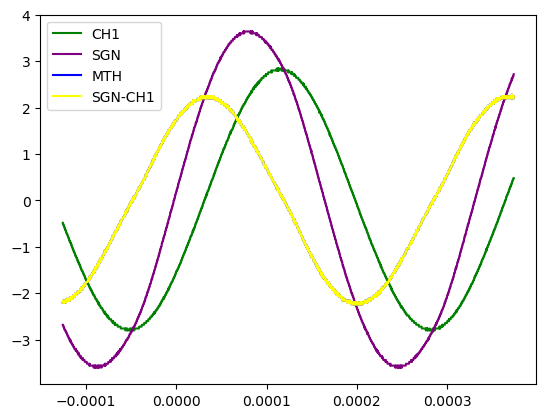

In [142]:
CH1, SGN, MTH = get_data('data.new/RL/3000/')
plt.plot(CH1[0], CH1[1], label='CH1', c='green')
plt.plot(SGN[0], SGN[1], label='SGN', c='purple')
plt.plot(MTH[0], MTH[1], label='MTH', c='blue')
plt.plot(CH1[0], SGN[1]-CH1[1], label='SGN-CH1', c='yellow')
plt.legend()

# RL

In [143]:
if 0:
    for i in sorted([int(i) for i in os.listdir('data.new/RL/')]):
        N = i
        path = 'data.new/RL/'+str(N)+'/'
        CH1,SGN,MTH, V_CH1_SGN, V_MTH_SGN, dt_CH1_SGN, dt_MTH_SGN, max_CH1, max_SGN, max_MTH, i_max_CH1, i_max_SGN, i_max_MTH, i_zero_CH1, i_zero_SGN, i_zero_MTH = analize(path, 0, True)
        plt.plot(SGN[0], SGN[1], label='SGN')
        plt.plot(CH1[0], CH1[1], label='CH1')
        plt.plot(MTH[0], MTH[1], label='MTH')
        plt.scatter(CH1[0][i_max_CH1], max_CH1, color='red')
        plt.scatter(MTH[0][i_max_MTH], max_MTH, color='red')
        plt.scatter(CH1[0][i_zero_CH1], CH1[0][i_zero_CH1], color='k')
        plt.scatter(SGN[0][i_zero_SGN], SGN[0][i_zero_SGN], color='k')
        plt.scatter(MTH[0][i_zero_MTH], MTH[0][i_zero_MTH], color='k')
        plt.scatter(SGN[0][i_max_SGN], 3.76, color='r')
        plt.grid()
        plt.legend()
        plt.title(i)
        plt.show()

In [63]:
L= 1/((6.6e3*2*np.pi)**2*12e-9)

R = 2*L/np.sqrt(L*12e-9)
R,L

(4019.0642194923066, 0.04845863160120991)

In [116]:
V_R, V_L, F_R, F_L = [], [], [], []
freqs = []

for i in sorted([int(i) for i in os.listdir('data.new/RL/')]):
    path = 'data.new/RL/'+str(i)+'/'
    V_res, V_l, dt_res, dt_c = analize(path, 0)
    V_R.append(V_res)
    V_L.append(V_l)
    F_R.append(dt_res*2*np.pi*int(i))
    F_L.append(dt_c*2*np.pi*int(i))
    freqs.append(int(i))

freqs = np.array(freqs)

# plt.scatter(freqs,V_R, label='V_R')
# plt.scatter(freqs,V_L, label='V_L')
# plt.plot(freqs,G_R(freqs*2*np.pi, R, L), label='teorico R')
# plt.plot(freqs,G_L(freqs*2*np.pi, R, L), label='teorico L')
# plt.xscale('log')

# plt.scatter(freqs,F_R, label='F_R')
# plt.scatter(freqs,F_L, label='F_L')
# plt.plot(freqs,fase_R(freqs, 1050, 0.048), label='teorico R')
# plt.plot(freqs,fase_L(freqs, 1050, 0.048), label='teorico L')
# plt.xscale('log')
# plt.legend()

{'R': 61.88642641431458, 'L': 0.016585692106624}


Text(0.5, 1.0, 'Funzione trasferimento modulo - R')

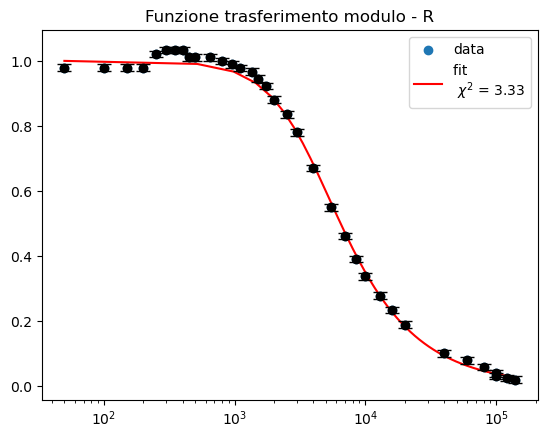

In [119]:
f = Fit(freqs, V_R, G_R, 0.01, kwargs={'R':1000, 'L':0.048})
f.fit()
f.visualize(cov=False)
print(f.values)
plt.legend()
plt.xscale('log')
plt.title('Funzione trasferimento modulo - R')

Text(0.5, 1.0, 'Funzione trasferimento modulo - L')

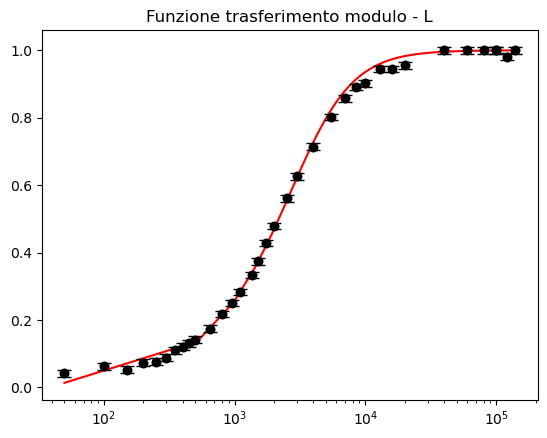

In [118]:
f = Fit(freqs, V_L, G_L, 0.01, kwargs={'R':1000, 'L':0.048})
f.fit()
f.visualize(cov=False)
plt.xscale('log')
plt.title('Funzione trasferimento modulo - L')

{'R': 748018.4289942714, 'L': 161.11254325794496}


Text(0.5, 1.0, 'Funzione trasferimento fase - R')

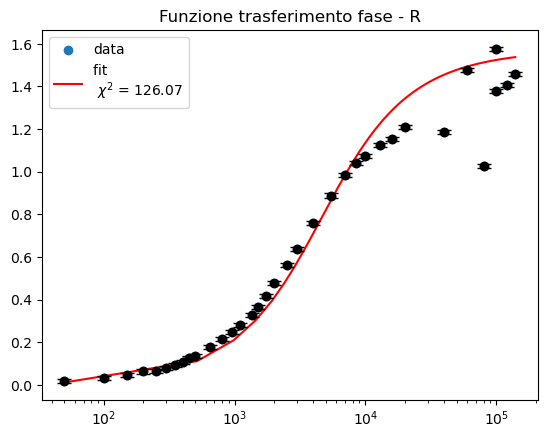

In [120]:
f = Fit(freqs, F_R, fase_R, 0.01, kwargs={'R':1000, 'L':0.048})
f.fit()
f.visualize(cov=False)
print(f.values)
plt.legend()
plt.xscale('log')
plt.title('Funzione trasferimento fase - R')

Text(0.5, 1.0, 'Funzione trasferimento fase - L')

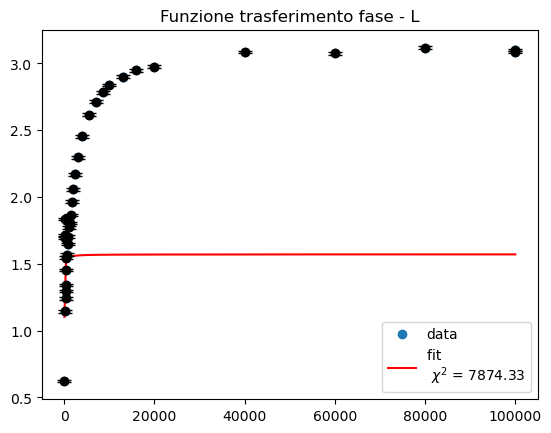

In [129]:
f = Fit(freqs[:-2], F_L[:-2], fase_L, 0.01, kwargs={'R':1040, 'L':0.048})
f.fit()
f.visualize(cov=False)
plt.legend()
# plt.xscale('log')
plt.title('Funzione trasferimento fase - L')